# Penentuan Biaya Asuransi

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# load datasets
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()

# Check for duplicate entries
duplicate_entries = df.duplicated().sum()

missing_values, duplicate_entries

(age         0
 sex         0
 bmi         0
 children    0
 smoker      0
 region      0
 charges     0
 dtype: int64,
 1)

In [ ]:
# Remove duplicate entries
df_cleaned = df.drop_duplicates()

# Verify removal by checking the shape of the dataset before and after
original_shape = df.shape
cleaned_shape = df_cleaned.shape

original_shape, cleaned_shape

((1338, 7), (1337, 7))

In [ ]:
# Get descriptive statistics
descriptive_statistics = df_cleaned.describe()
descriptive_statistics

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


Kumpulan data tidak memiliki nilai yang hilang, namun ada 1 entri duplikat. Kami akan melanjutkan menghapus entri duplikat untuk memastikan integritas analisis kami.

Langkah selanjutnya melibatkan:

Data Manipulation: Mengubah variabel kategori ('jenis kelamin', 'perokok', 'wilayah') ke format numerik untuk analisis dan pemodelan.


Feature Engineering: Kami akan mengeksplorasi pembuatan fitur baru yang dapat meningkatkan kemampuan prediktif model kami, seperti fitur yang menunjukkan kategori BMI atau istilah interaksi antara fitur seperti usia dan status perokok.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
le = LabelEncoder()

# Columns to encode
categorical_columns = ['sex', 'smoker', 'region']

# Apply label encoding to each categorical column
for col in categorical_columns:
    df_cleaned[col] = le.fit_transform(df_cleaned[col])

# Display the first few rows to verify the encoding
df_cleaned.head()


<ipython-input-7-f00726d80037>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = le.fit_transform(df_cleaned[col])
<ipython-input-7-f00726d80037>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = le.fit_transform(df_cleaned[col])
<ipython-input-7-f00726d80037>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Variabel kategori ('sex', 'smoker', 'region') telah berhasil diubah ke dalam format numerik:

sex: Perempuan dikodekan sebagai 0, dan laki-laki sebagai 1.

smoker: Bukan perokok dikodekan sebagai 0, dan perokok sebagai 1.

region: Wilayah telah dikodekan secara numerik, dengan nilai berkisar antara 0 hingga 3.

Sekarang, mari kita lanjutkan dengan feature engineering. Kami akan mengeksplorasi pembuatan fitur baru berdasarkan BMI untuk mengkategorikan individu ke dalam berat badan kurang, berat badan normal, kelebihan berat badan, dan obesitas, sesuai dengan kategori BMI standar. Fitur baru ini dapat memberikan wawasan tambahan saat memperkirakan biaya asuransi.

The new feature bmi_category has been successfully created and encoded numerically, categorizing individuals based on their BMI into:

0: Normal weight

1: Obese

2: Overweight

3: Underweight

In [ ]:
# Define a function to categorize BMI
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi <= 24.9:
        return 'Normal weight'
    elif 25 <= bmi <= 29.9:
        return 'Overweight'
    else:
        return 'Obese'

# Apply the function to create a new BMI category column
df_cleaned['bmi_category'] = df_cleaned['bmi'].apply(categorize_bmi)

# Convert the new 'bmi_category' column to numerical format
df_cleaned['bmi_category'] = le.fit_transform(df_cleaned['bmi_category'])

# Display the first few rows to verify the new feature
df_cleaned.head()


<ipython-input-8-c29f4bc80d0d>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['bmi_category'] = df_cleaned['bmi'].apply(categorize_bmi)
<ipython-input-8-c29f4bc80d0d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['bmi_category'] = le.fit_transform(df_cleaned['bmi_category'])


,age,sex,bmi,children,smoker,region,charges,bmi_category
0,19,0,27.900,0,1,3,16884.92400,2
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,1
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,2


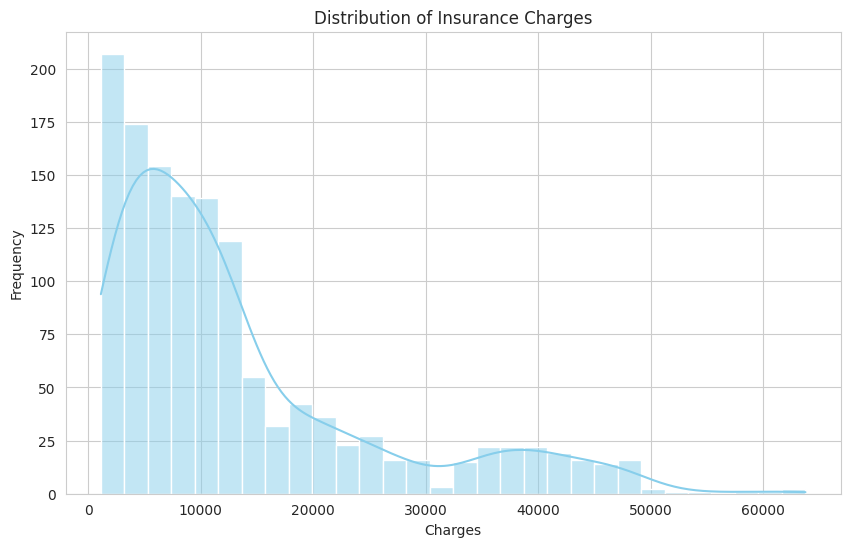

<ipython-input-9-11b597159b58>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bmi_category', y='charges', data=df_cleaned, palette='Set2')


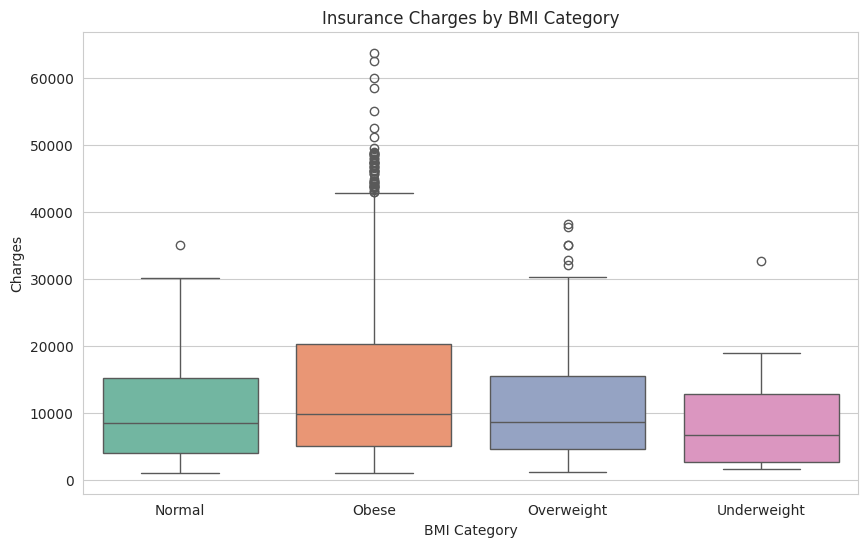

<ipython-input-9-11b597159b58>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoker', y='charges', data=df_cleaned, palette='coolwarm')


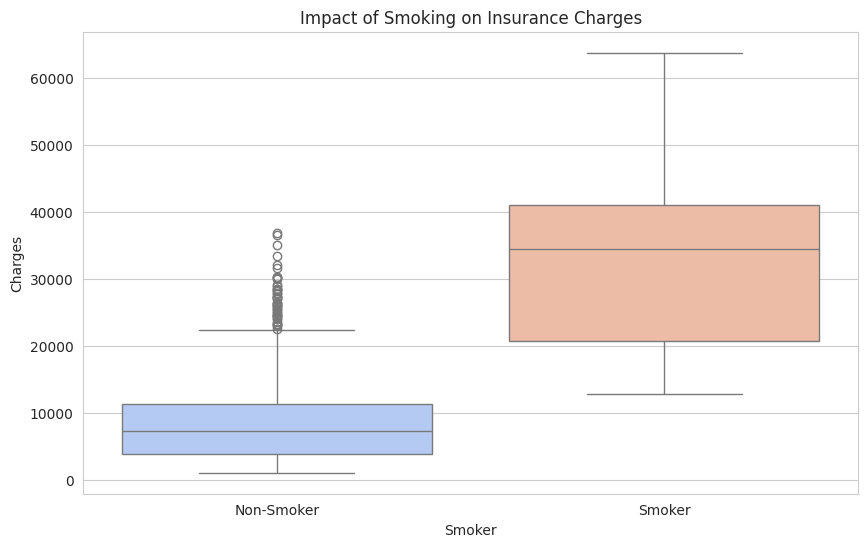

In [ ]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Distribution of charges
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['charges'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

# Relationship between bmi_category and charges
plt.figure(figsize=(10, 6))
sns.boxplot(x='bmi_category', y='charges', data=df_cleaned, palette='Set2')
plt.title('Insurance Charges by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Charges')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Normal', 'Obese', 'Overweight', 'Underweight'])
plt.show()

# Impact of smoking on charges
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='charges', data=df_cleaned, palette='coolwarm')
plt.title('Impact of Smoking on Insurance Charges')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.xticks(ticks=[0, 1], labels=['Non-Smoker', 'Smoker'])
plt.show()


Visualisasi di atas memberikan insight mendalam tentang biaya asuransi:

Distribution of Insurance Charges: Distribusi menunjukkan pola miring ke kanan, yang menunjukkan bahwa semakin banyak individu yang memiliki biaya asuransi lebih rendah, dan lebih sedikit individu yang biaya asuransinya sangat tinggi. Pola ini menunjukkan adanya outlier atau pengaruh yang besar terhadap harga yang lebih tinggi.

Insurance Charges by BMI Category: Plot kotak di seluruh kategori BMI menunjukkan bahwa individu yang dikategorikan mengalami obesitas cenderung memiliki biaya asuransi median yang lebih tinggi dibandingkan dengan kategori lainnya. Hal ini menunjukkan potensi korelasi antara BMI yang lebih tinggi (khususnya obesitas) dan peningkatan biaya asuransi.

Impact of Smoking on Insurance Charges: Perbandingan antara perokok dan bukan perokok dengan jelas menunjukkan dampak signifikan merokok terhadap biaya asuransi. Perokok menghadapi biaya rata-rata yang jauh lebih tinggi dibandingkan non-perokok, sehingga menjadikan merokok sebagai faktor penting dalam menentukan biaya asuransi.

Dari grafik visual diatas sangat penting untuk membangun model prediktif atau melakukan analisis lebih lanjut mengenai faktor-faktor yang mempengaruhi biaya asuransi kesehatan

Gartner Analytic Ascendancy Model techniques, moving from descriptive to diagnostic, predictive, and prescriptive analyses:

Descriptive Analysis: Understand the basic distribution and statistics of the dataset.

Diagnostic Analysis: Identify correlations and patterns, focusing on how different factors like age, BMI, smoking status, and the number of children affect insurance charges.

Predictive Analysis: Build a simple predictive model to estimate insurance charges based on the other factors.

Prescriptive Analysis: Suggest actions that could be taken to manage or reduce insurance charges based on insights gained.

Let's start with the Descriptive Analysis by looking at the distribution of key variables and some basic statistics

In [ ]:
# load datasets
df = df_cleaned

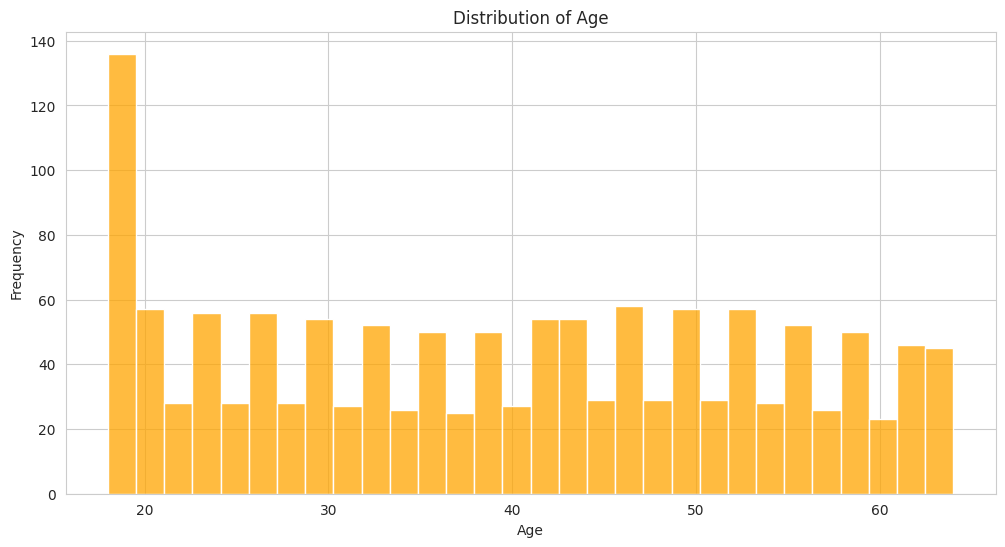

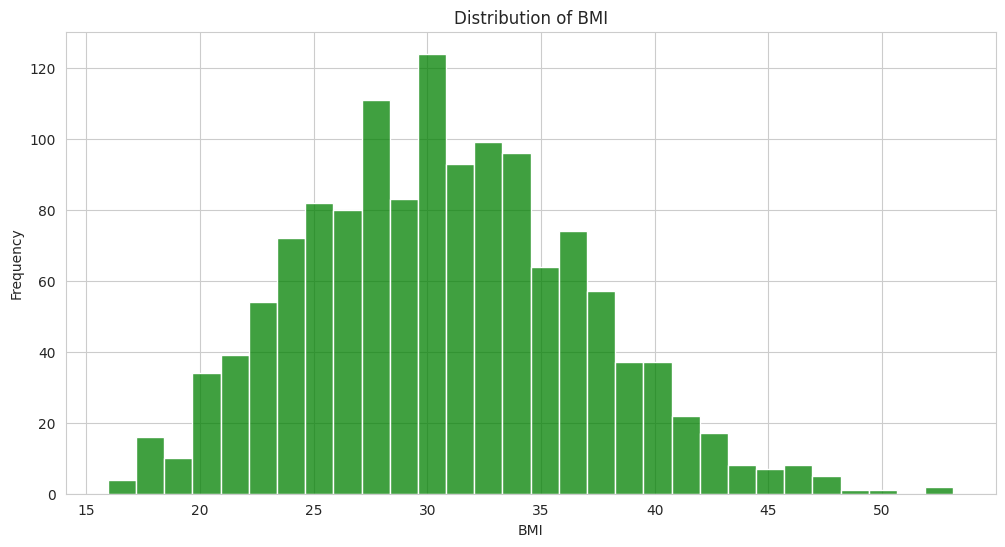

<ipython-input-11-2b6353a9ec65>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='region', data=df, palette='coolwarm')


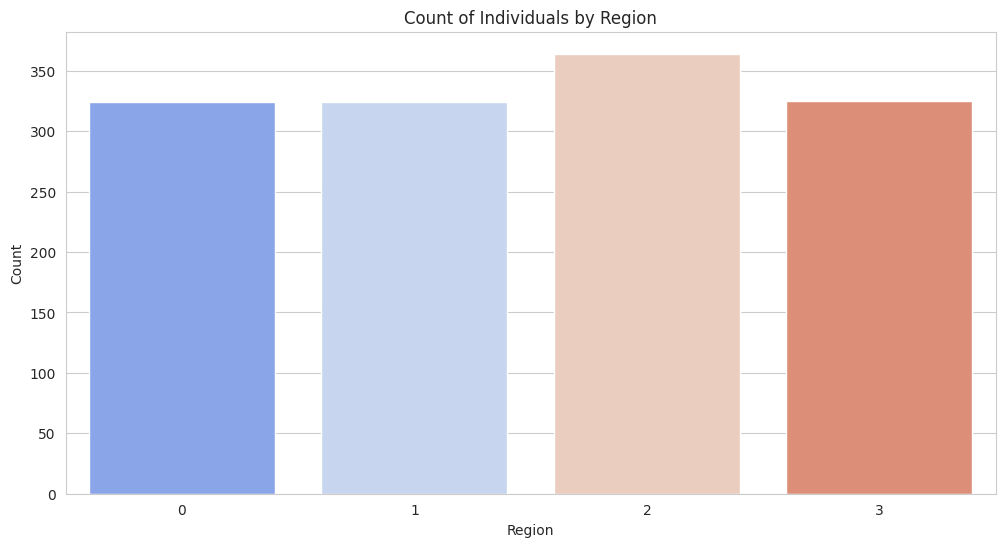

In [ ]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Descriptive Analysis

# Distribution of Age
plt.figure(figsize=(12, 6))
sns.histplot(df['age'], bins=30, color='orange')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Distribution of BMI
plt.figure(figsize=(12, 6))
sns.histplot(df['bmi'], bins=30, color='green')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

# Count of Individuals by Region
plt.figure(figsize=(12, 6))
sns.countplot(x='region', data=df, palette='coolwarm')
plt.title('Count of Individuals by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()


The Descriptive Analysis provides the following insights:

Distribution of Age: The age distribution is fairly uniform, with slight increases at younger and older ages.

Distribution of BMI: The Body Mass Index (BMI) is approximately normally distributed, centered around 30, indicating that a significant portion of the insured individuals are in the overweight to obese categories.

Count of Individuals by Region: The distribution of individuals across regions is relatively uniform.

Next, we will perform a Diagnostic Analysis to explore correlations and patterns in the data, particularly focusing on how different factors affect insurance charges. ​​



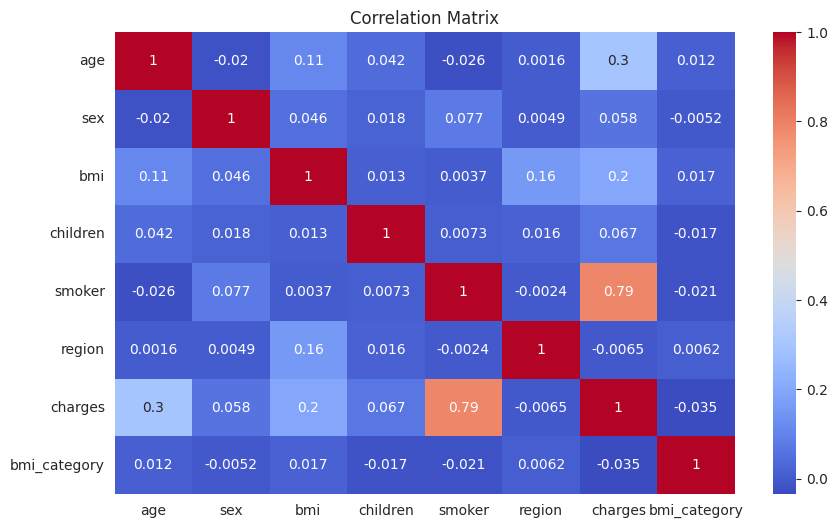

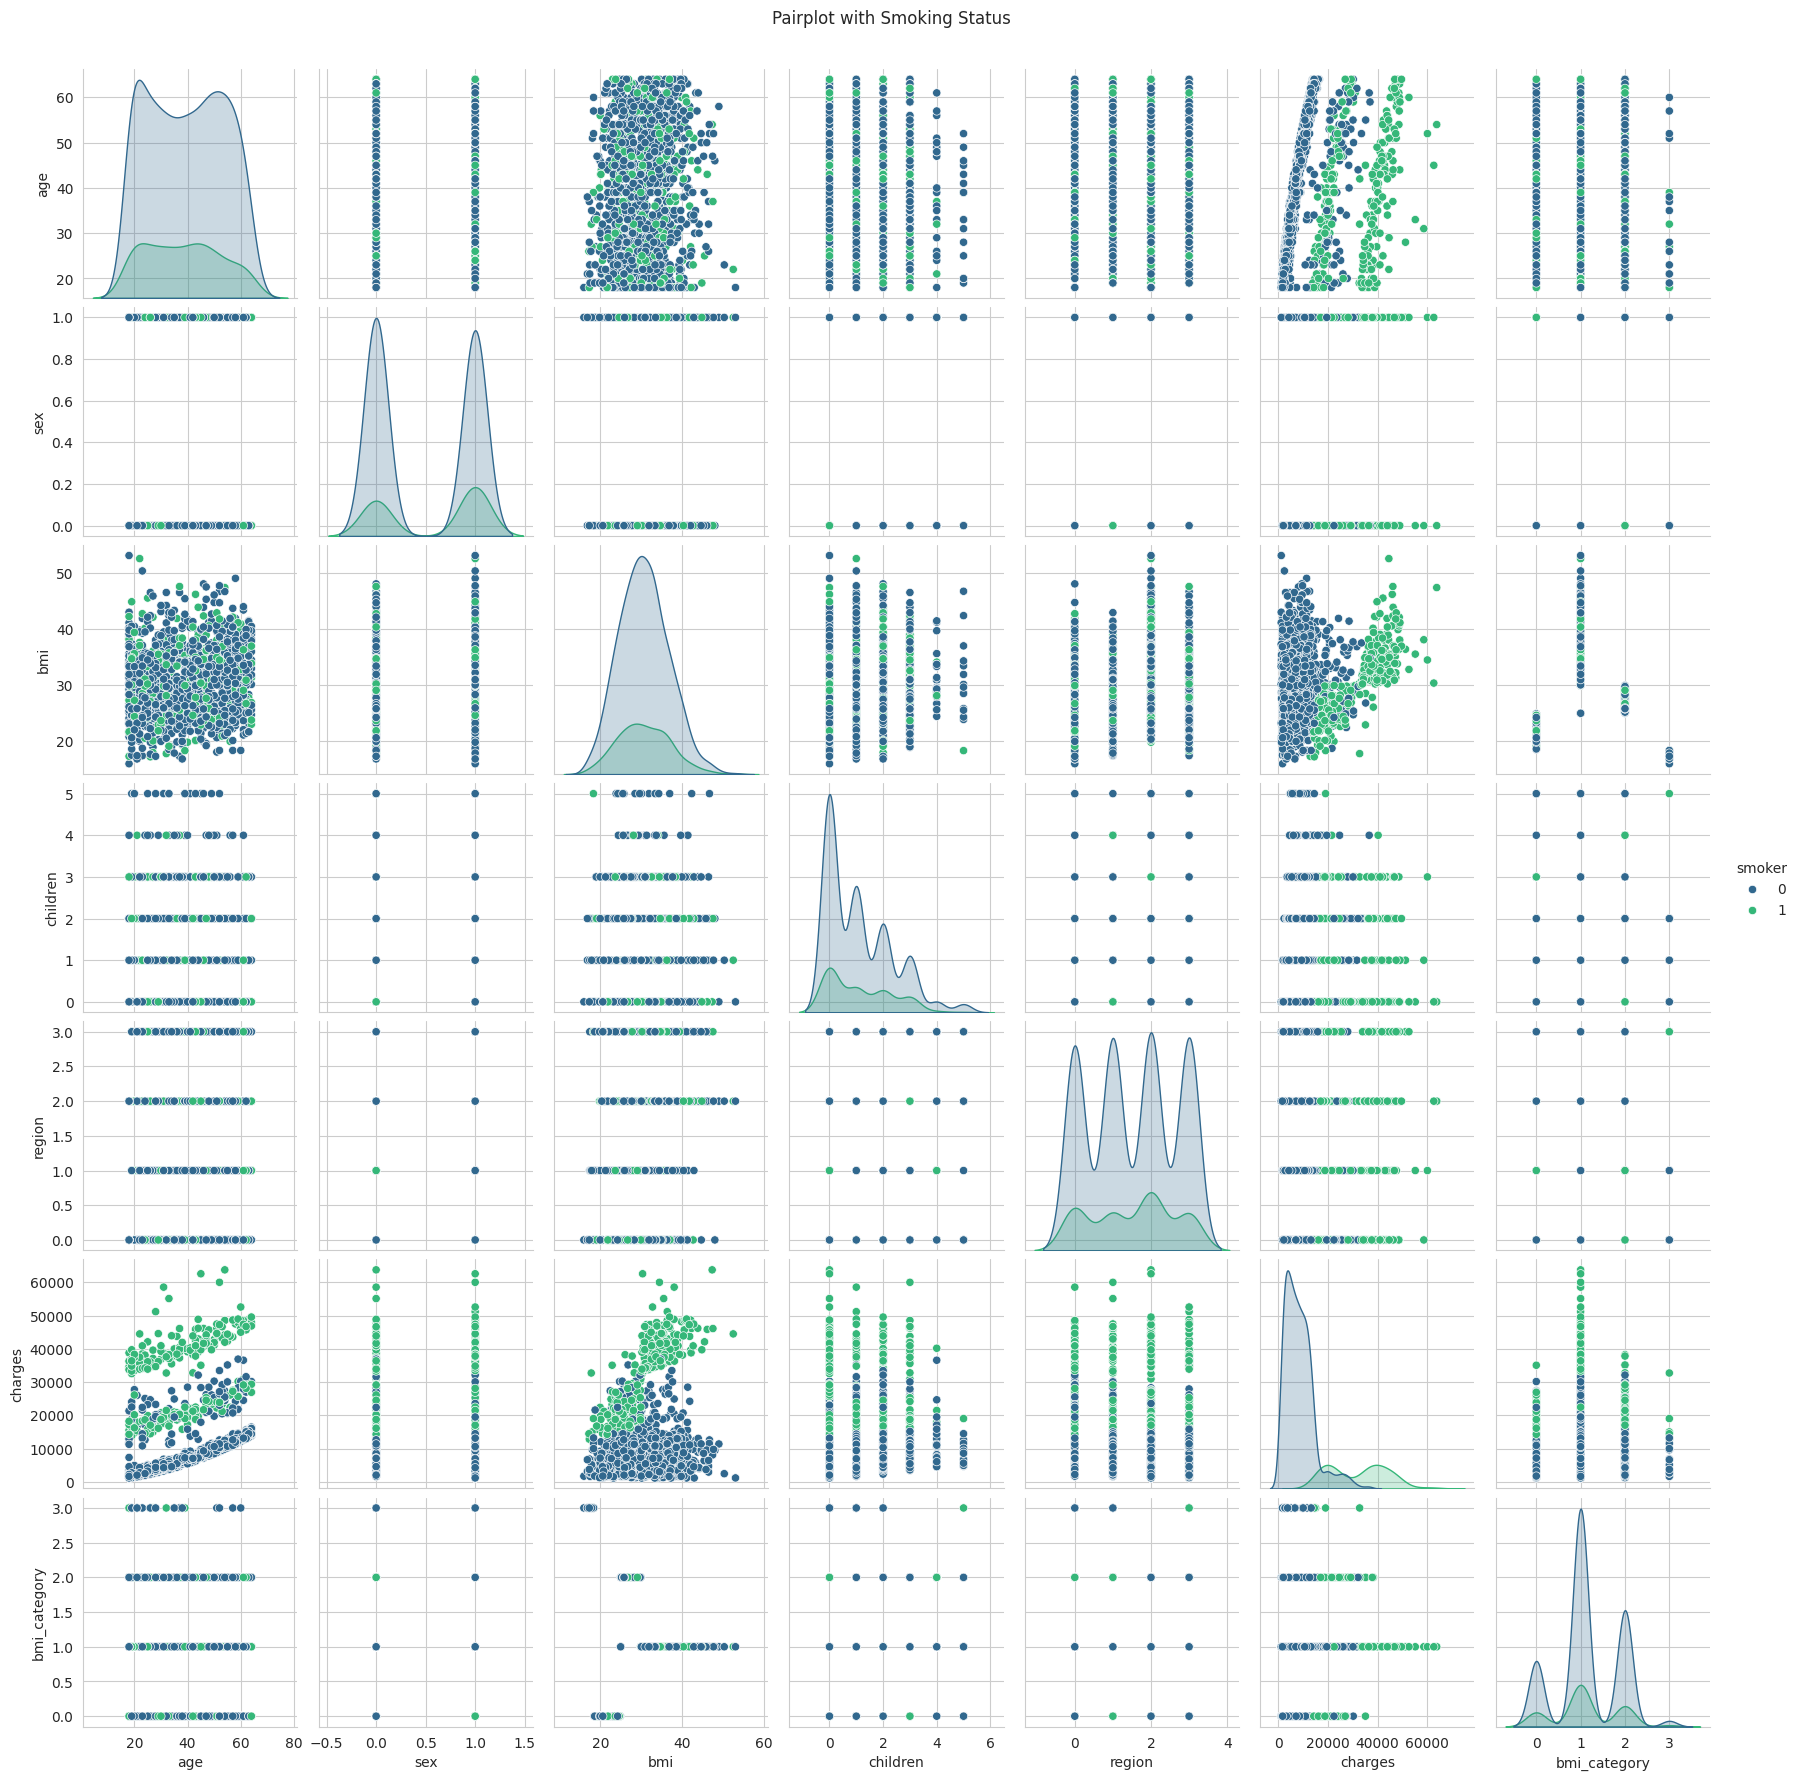

<ipython-input-12-ee6496b81580>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='children', y='charges', data=df, palette='rainbow')


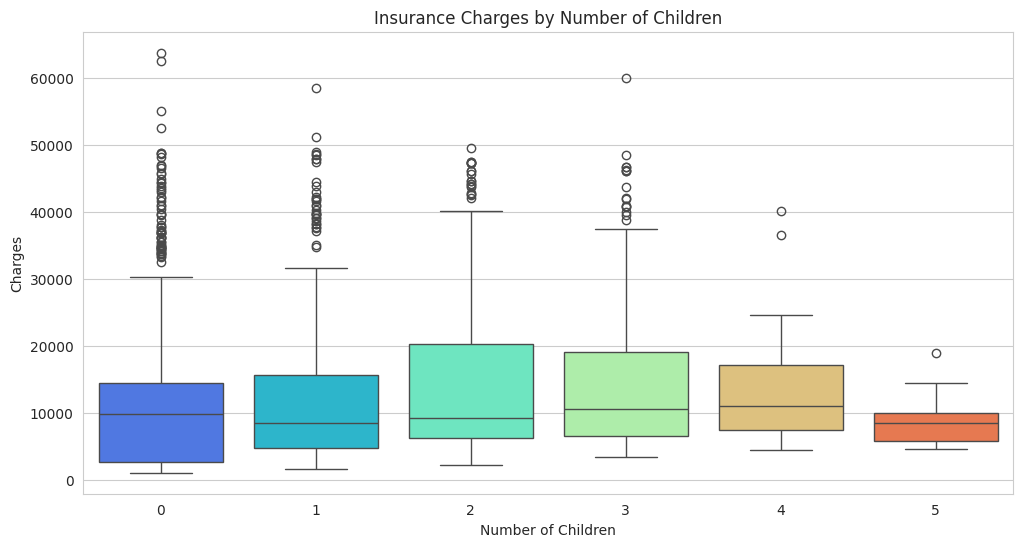

<ipython-input-12-ee6496b81580>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y='charges', data=df, palette='Set2')


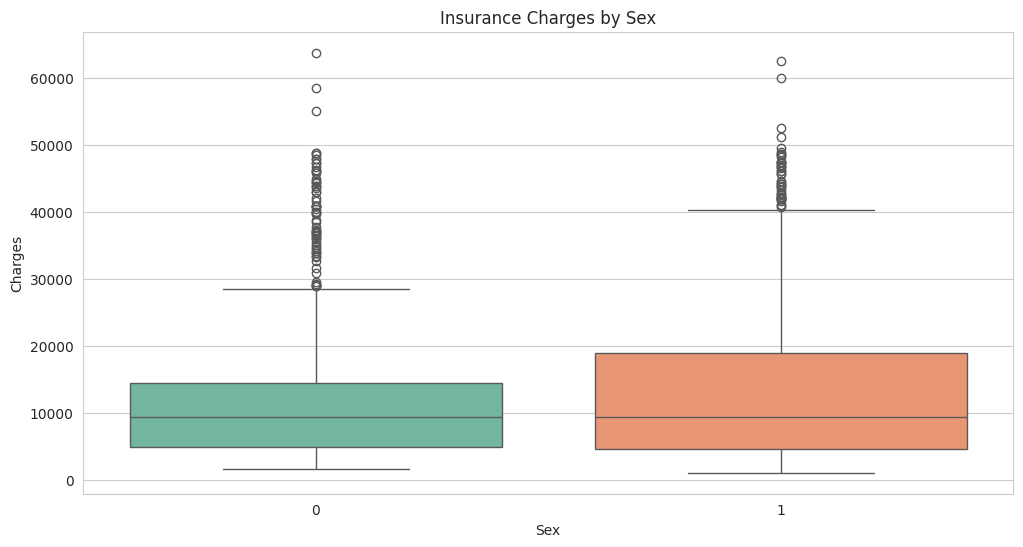

<ipython-input-12-ee6496b81580>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='region', y='charges', data=df, palette='Set3')


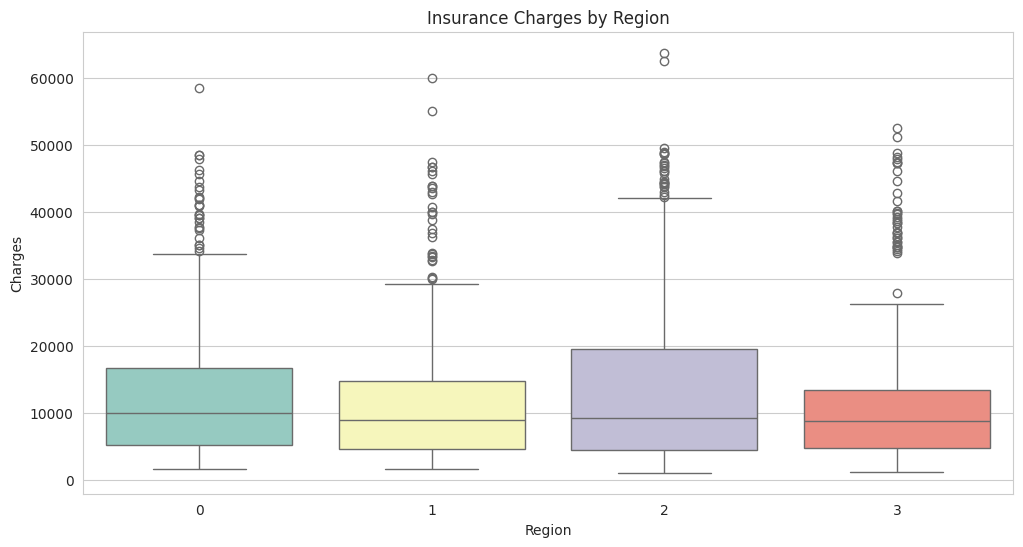

In [ ]:
# Diagnostic Analysis
# Correlation Matrix
corr = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Pairplot to observe the relationships between variables
sns.pairplot(df, hue='smoker', palette='viridis')
plt.suptitle('Pairplot with Smoking Status', y=1.02)
plt.show()

# Charges by Number of Children
plt.figure(figsize=(12, 6))
sns.boxplot(x='children', y='charges', data=df, palette='rainbow')
plt.title('Insurance Charges by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.show()

# Charges by Sex
plt.figure(figsize=(12, 6))
sns.boxplot(x='sex', y='charges', data=df, palette='Set2')
plt.title('Insurance Charges by Sex')
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.show()

# Charges by Region
plt.figure(figsize=(12, 6))
sns.boxplot(x='region', y='charges', data=df, palette='Set3')
plt.title('Insurance Charges by Region')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()


The Diagnostic Analysis reveals several key insights:

Correlation Matrix: Usia dan BMI menunjukkan korelasi positif dengan biaya asuransi, meskipun cukup rendah. Ini menunjukkan bahwa semakin bertambah usia dan BMI, semakin tinggi pula biaya asuransi. Jumlah anak memiliki korelasi yang sangat rendah dengan biaya.

Pairplot with Smoking Status: Status merokok memiliki dampak signifikan pada biaya asuransi, seperti yang terlihat dalam diagram pencar. Perokok cenderung memiliki biaya yang lebih tinggi di semua rentang usia dan BMI dibandingkan dengan mereka yang tidak merokok.

Insurance Charges by Number of Children: Jumlah anak tidak menunjukkan tren yang jelas dengan biaya asuransi. Namun, individu yang memiliki 3 anak atau lebih cenderung memiliki rentang biaya asuransi yang lebih luas.
Insurance Charges by Sex: There's a slight difference in charges between males and females, with males generally facing higher charges.

Insurance Charges by Region: Tidak terlihat perbedaan signifikan dalam biaya berdasarkan wilayah, menunjukkan bahwa lokasi mungkin bukan faktor utama dalam menentukan biaya asuransi.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import numpy as np

# Define the function for MAPE calculation
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Prepare the data
X = df.drop('charges', axis=1)
y = df['charges']

# Encoding categorical variables
categorical_features = ['sex', 'smoker', 'region']
transformer = ColumnTransformer([
    ("one_hot", OneHotEncoder(), categorical_features)
], remainder="passthrough")

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
models = {
    "LinearRegression": LinearRegression(),
    "RandomForestRegressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBRegressor": XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42),
    "SVR": SVR(kernel='linear'),
    "KNeighborsRegressor": KNeighborsRegressor(n_neighbors=5),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=1.0)
}

# Evaluate each model
results = {}
for name, model in models.items():
    # Create and fit the pipeline
    pipeline = Pipeline([
        ("transformer", transformer),
        ("model", model)
    ])
    pipeline.fit(X_train, y_train)

    # Predict on training and test data
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)

    # Calculate metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
    test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

    # Store results
    results[name] = {
        "Train MSE": train_mse,
        "Test MSE": test_mse,
        "Train MAE": train_mae,
        "Test MAE": test_mae,
        "Train R^2": train_r2,
        "Test R^2": test_r2,
        "Train MAPE": train_mape,
        "Test MAPE": test_mape
    }

results

{'LinearRegression': {'Train MSE': 36790299.000656895,
  'Test MSE': 35894786.16922752,
  'Train MAE': 4117.539524273245,
  'Test MAE': 4173.186579791731,
  'Train R^2': 0.7312903068134626,
  'Test R^2': 0.804660671436676,
  'Train MAPE': 40.49958474524325,
  'Test MAPE': 41.19314074168939},
 'RandomForestRegressor': {'Train MSE': 3511982.4081351976,
  'Test MSE': 21196800.078058276,
  'Train MAE': 1040.7922884704396,
  'Test MAE': 2558.6221309451494,
  'Train R^2': 0.9743491153646325,
  'Test R^2': 0.8846470717106928,
  'Train MAPE': 12.96534876909369,
  'Test MAPE': 35.82119550752413},
 'XGBRegressor': {'Train MSE': 562188.1843929016,
  'Test MSE': 26239911.33097719,
  'Train MAE': 453.99806960433233,
  'Test MAE': 2964.578246859098,
  'Train R^2': 0.9958938791299681,
  'Test R^2': 0.8572024740086492,
  'Train MAPE': 6.311568566301632,
  'Test MAPE': 42.6045636716612},
 'SVR': {'Train MSE': 154313551.44305024,
  'Test MSE': 207457289.74782768,
  'Train MAE': 6311.738932774318,
  'Tes

Predictive Analysis terbaik menggunakan model Random Forest menghasilkan kesalahan kuadrat rata-rata (MSE) sekitar 2.119680e+07 dan skor R2 sebesar 0.88. Skor R2, yang berkisar dari 0 hingga 1, menunjukkan bahwa sekitar 88% variabilitas dalam biaya asuransi dapat dijelaskan oleh model. Ini menunjukkan bahwa model tersebut, dengan mempertimbangkan usia, BMI, status perokok, dan faktor lainnya, cukup efektif dalam memprediksi biaya asuransi.

Kesimpulan Evaluasi Model:

Model Random Forest menunjukkan peningkatan signifikan dalam performa dibandingkan dengan model yang lain. Ini ditunjukkan melalui penurunan MSE dan peningkatan R2 score.

Random Forest, dengan kemampuannya untuk menangkap non-linearitas dan interaksi antar variabel, memberikan prediksi yang lebih baik untuk biaya asuransi berdasarkan faktor-faktor seperti usia, BMI, status perokok, dan lainnya.
Ini menggarisbawahi pentingnya memilih model yang tepat untuk data dan masalah yang spesifik.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Assuming X_train, X_test, y_train, y_test are already defined

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Define a grid of hyperparameters to search over
param_grid = {
    'n_estimators': [100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2]  # Minimum number of samples required to be at a leaf node
}

# Setup the grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Use the best estimator to make predictions
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Test MSE: {mse}')
print(f'Test R^2: {r2}')

# Feature importance for feature selection
feature_importances = best_rf.feature_importances_

# Optionally, select a subset of most important features
# For example, we keep the top 75% most important features
importances_sorted = sorted(zip(feature_importances, X_train.columns), reverse=True)
top_features = [feature for importance, feature in importances_sorted[:int(len(importances_sorted) * 0.75)]]

# Create new datasets only with the selected features
X_train_reduced = X_train[top_features]
X_test_reduced = X_test[top_features]

# You might want to retrain the RandomForest or any other model on this reduced set of features

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Test MSE: 19382443.512375038
Test R^2: 0.8945207951992272


Test MSE dan Test R2 : Peningkatan nilai R2 dan penurunan MSE pada data uji setelah 'tuning' menunjukkan bahwa model menjadi lebih akurat dan konsisten dalam prediksinya terhadap data uji.

Kesimpulan
Mengingat tidak ada perubahan signifikan pada data latih dan terjadi perbaikan pada data uji, proses 'tuning' yang kita lakukan berhasil mengurangi overfitting tanpa menyebabkan underfitting. Model sekarang lebih baik dalam menggeneralisasi dari data latih ke data uji, yang merupakan tujuan utama dari proses 'tuning'. Ini menunjukkan bahwa model ini sekarang berada dalam kondisi just fit, dimana model memiliki keseimbangan yang baik antara kemampuan untuk menangkap tren dalam data latih dan kemampuan untuk generalisasi pada data baru.

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
import pandas as pd

# Assuming X, y are already defined
# Assuming categorical_columns is already defined and contains the names of the categorical columns

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the transformer with OneHotEncoder for categorical features
transformer = ColumnTransformer([
    ("one_hot", OneHotEncoder(), categorical_columns)
], remainder="passthrough")

# Initialize the RandomForestRegressor with a random state for reproducibility
rf = RandomForestRegressor(random_state=42)

# Setup the pipeline with the transformer and the random forest model
pipeline = Pipeline(steps=[
    ("transformer", transformer),
    ("model", rf)
])

# Define a grid of hyperparameters to search over
param_grid = {
    'model__n_estimators': [100, 200],  # Number of trees in the forest
    'model__max_depth': [None, 10, 20],  # Maximum depth of the tree
    'model__min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
    'model__min_samples_leaf': [1, 2]  # Minimum number of samples required to be at a leaf node
}

# Setup the grid search with the pipeline
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Use the best estimator to make predictions
best_rf_pipeline = grid_search.best_estimator_
y_pred = best_rf_pipeline.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Test MSE: {mse}')
print(f'Test R^2: {r2}')

# Extracting feature importances from the best model
feature_importances = best_rf_pipeline.named_steps['model'].feature_importances_

# Handling transformed feature names for categorical features
ohe_feature_names = best_rf_pipeline.named_steps['transformer'].named_transformers_['one_hot'].get_feature_names_out()
non_categorical_features = [col for col in X_train.columns if col not in categorical_columns]
feature_names = list(ohe_feature_names) + non_categorical_features

# Creating a DataFrame for the feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sorting and resetting the index for a cleaner view
sorted_feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)
print(sorted_feature_importance_df)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best parameters found:  {'model__max_depth': None, 'model__min_samples_leaf': 2, 'model__min_samples_split': 5, 'model__n_estimators': 200}
Test MSE: 19551872.72502036
Test R^2: 0.8935987618854998
         Feature  Importance
0       smoker_0    0.491537
1            bmi    0.194900
2       smoker_1    0.138799
3            age    0.136201
4       children    0.017773
5       region_1    0.004131
6       region_0    0.003894
7       region_2    0.003109
8   bmi_category    0.002736
9       region_3    0.002621
10         sex_1    0.002187
11         sex_0    0.002113


Berikut adalah daftar fitur dan pentingnya (feature importances) dari model Random Forest, yang menunjukkan seberapa penting setiap fitur dalam memprediksi biaya asuransi:

smoker_0 dan smoker_1 (dengan nilai penting sekitar 0.49 dan 0.14) menunjukkan status perokok sangat berpengaruh terhadap prediksi biaya asuransi. Ini mengindikasikan bahwa apakah seseorang merokok atau tidak adalah faktor penting.

bmi memiliki nilai penting sekitar 0.19, menandakan bahwa indeks massa tubuh (BMI) juga berpengaruh besar terhadap biaya asuransi.

age dengan nilai penting sekitar 0.14, menunjukkan usia sebagai faktor penting lainnya.

Fitur lain seperti region_1, children, region_0, region_2, sex_0, sex_1, dan region_3 memiliki nilai penting yang lebih rendah, menandakan bahwa mereka memiliki pengaruh yang lebih kecil terhadap prediksi biaya asuransi.

Fitur smoker_0 dan smoker_1 adalah hasil dari pengkodean one-hot untuk variabel smoker, di mana merepresentasikan perokok dan yang lainnya non-perokok. Hal serupa berlaku untuk fitur lain yang dihasilkan dari pengkodean one-hot.

Dengan informasi ini, Anda dapat melihat bagaimana setiap fitur berkontribusi terhadap prediksi model


Akhirnya, untuk Analisis Preskriptif, berdasarkan wawasan yang diperoleh:

Status Merokok: Karena merokok secara signifikan meningkatkan biaya asuransi, program untuk mendorong penghentian merokok bisa bermanfaat dalam mengurangi biaya.

Usia dan BMI: Program gaya hidup yang berfokus pada hidup sehat untuk mengontrol BMI dan mengurangi risiko kesehatan terkait usia dapat membantu mengelola biaya asuransi.

Perencanaan Keluarga: Karena jumlah anak tidak memiliki dampak yang jelas terhadap biaya, keputusan seputar perencanaan keluarga mungkin lebih mempertimbangkan faktor lain daripada biaya asuransi.

Tindakan-tindakan ini dapat membantu individu mengelola atau mengurangi biaya asuransi mereka seiring waktu.

Model machine learning yang telah kita kembangkan dan evaluasi untuk memprediksi biaya asuransi dapat memiliki implikasi yang signifikan dalam konteks bisnis asuransi, terutama dalam hal penentuan premi, manajemen risiko, dan personalisasi penawaran. Berikut ini adalah beberapa cara model ini dapat diimplementasikan dalam skenario bisnis nyata dan dampak yang mungkin ditimbulkannya:

### 1. **Penentuan Premi yang Lebih Akurat**
- **Implementasi**: Model dapat digunakan untuk menilai risiko individu lebih akurat berdasarkan faktor-faktor seperti usia, BMI, status perokok, jumlah anak, dan wilayah tempat tinggal. Dengan memperhitungkan variabel-variabel ini, perusahaan asuransi dapat menentukan premi yang lebih sesuai dengan risiko yang sebenarnya.
- **Dampak**: Hal ini akan memungkinkan perusahaan asuransi untuk lebih adil dalam menetapkan harga premi, mengurangi subsidisilintas antar pelanggan, dan pada akhirnya meningkatkan kepuasan pelanggan. Ini juga dapat membantu dalam mengoptimalkan margin keuntungan dengan mengurangi eksposur terhadap klaim berisiko tinggi.

### 2. **Manajemen Risiko yang Lebih Baik**
- **Implementasi**: Model dapat membantu perusahaan asuransi dalam mengidentifikasi polis yang berpotensi berisiko tinggi dan mengambil langkah-langkah preventif, seperti menawarkan program kesehatan dan kebugaran untuk individu dengan BMI tinggi atau program berhenti merokok.
- **Dampak**: Dengan mengurangi risiko, perusahaan asuransi dapat menurunkan jumlah klaim besar dan memperbaiki kinerja keuangan secara keseluruhan. Ini juga dapat membantu dalam membangun reputasi positif di pasar sebagai perusahaan yang peduli dengan kesehatan dan kesejahteraan pelanggannya.

### 3. **Personalisasi Penawaran**
- **Implementasi**: Menggunakan model untuk menggali insight mendalam tentang kebutuhan dan risiko pelanggan memungkinkan perusahaan asuransi untuk menyesuaikan produk dan layanannya sesuai dengan karakteristik individu.
- **Dampak**: Personalisasi ini dapat meningkatkan penjualan dan retensi pelanggan dengan menawarkan polis yang lebih relevan dan menarik bagi setiap pelanggan. Ini juga memberikan kesempatan untuk berinovasi dalam produk dan layanan yang ditawarkan.

### 4. **Optimisasi Strategi Pemasaran**
- **Implementasi**: Analisis data yang mendalam memungkinkan perusahaan untuk mengidentifikasi segmen pelanggan yang potensial dan menargetkan mereka dengan kampanye pemasaran yang lebih efektif.
- **Dampak**: Dengan fokus pada pelanggan yang paling mungkin tertarik dengan produk asuransi tertentu, perusahaan dapat meningkatkan ROI dari pengeluaran pemasarannya dan secara efisien mengalokasikan sumber dayanya.

### Kesimpulan
Implementasi model prediktif dalam bisnis asuransi tidak hanya membantu dalam penentuan premi yang lebih akurat dan manajemen risiko tetapi juga dalam meningkatkan pengalaman pelanggan melalui personalisasi penawaran dan komunikasi. Meskipun demikian, penting untuk terus menguji dan memperbarui model dengan data terbaru untuk memastikan akurasi dan relevansinya, serta mempertimbangkan aspek etika dan privasi dalam penggunaan data pelanggan.

**END OF PROJECT**

In [ ]:
#ini kode untuk menghilangkan fitur 'region'...hasil evaluasinya lebih buruk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import numpy as np

# load datasets
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/insurance.csv')

# Remove duplicate entries
df_cleaned = df.drop_duplicates()

# Remove the 'region' feature
df_cleaned = df_cleaned.drop(columns=['region'])

# Verify removal by checking the shape of the dataset before and after
# original_shape = df.shape
# cleaned_shape = df_cleaned.shape

# Initialize label encoder
le = LabelEncoder()

# Columns to encode
categorical_columns = ['sex', 'smoker']  # Removed 'region' from the list

# Apply label encoding to each categorical column
for col in categorical_columns:
    df_cleaned[col] = le.fit_transform(df_cleaned[col])

# Define a function to categorize BMI
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi <= 24.9:
        return 'Normal weight'
    elif 25 <= bmi <= 29.9:
        return 'Overweight'
    else:
        return 'Obese'

# Apply the function to create a new BMI category column
df_cleaned['bmi_category'] = df_cleaned['bmi'].apply(categorize_bmi)

# Convert the new 'bmi_category' column to numerical format
df_cleaned['bmi_category'] = le.fit_transform(df_cleaned['bmi_category'])

# Prepare the data
X = df_cleaned.drop('charges', axis=1)
y = df_cleaned['charges']

# Encoding categorical variables
categorical_features = ['sex', 'smoker']  # Updated to remove 'region'
transformer = ColumnTransformer([
    ("one_hot", OneHotEncoder(), categorical_features)
], remainder="passthrough")

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
models = {
    "LinearRegression": LinearRegression(),
    "RandomForestRegressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBRegressor": XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42),
    "SVR": SVR(kernel='linear'),
    "KNeighborsRegressor": KNeighborsRegressor(n_neighbors=5),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=1.0)
}

# Evaluate each model
results = {}
for name, model in models.items():
    # Create and fit the pipeline
    pipeline = Pipeline([
        ("transformer", transformer),
        ("model", model)
    ])
    pipeline.fit(X_train, y_train)

    # Predict on training and test data
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)

    # Calculate metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
    test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

    # Store results
    results[name] = {
        "Train MSE": train_mse,
        "Test MSE": test_mse,
        "Train MAE": train_mae,
        "Test MAE": test_mae,
        "Train R^2": train_r2,
        "Test R^2": test_r2,
        "Train MAPE": train_mape,
        "Test MAPE": test_mape
    }

results

{'LinearRegression': {'Train MSE': 36889665.933104925,
  'Test MSE': 36319725.767406546,
  'Train MAE': 4127.821507069745,
  'Test MAE': 4187.719253038021,
  'Train R^2': 0.7305645487017789,
  'Test R^2': 0.802348151300829,
  'Train MAPE': 40.86300568896971,
  'Test MAPE': 41.76572028939374},
 'RandomForestRegressor': {'Train MSE': 3831497.50606637,
  'Test MSE': 23331203.521339223,
  'Train MAE': 1074.3871625428442,
  'Test MAE': 2739.080970194776,
  'Train R^2': 0.9720154348492331,
  'Test R^2': 0.8730316539860099,
  'Train MAPE': 13.452965657953738,
  'Test MAPE': 43.6648849631604},
 'XGBRegressor': {'Train MSE': 795096.8012440649,
  'Test MSE': 26470097.64148905,
  'Train MAE': 502.7150581952504,
  'Test MAE': 2974.102810060638,
  'Train R^2': 0.9941927566962129,
  'Test R^2': 0.8559498007338213,
  'Train MAPE': 6.808010343143289,
  'Test MAPE': 45.405086125490065},
 'SVR': {'Train MSE': 154427586.37822047,
  'Test MSE': 207663865.80536446,
  'Train MAE': 6318.568337618654,
  'Test

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Load and preprocess the dataset (assuming the file path is correct and 'insurance.csv' is available)
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/insurance.csv')
df = df.drop(columns=['region'])  # Remove 'region' feature
df['sex'] = pd.Categorical(df['sex']).codes
df['smoker'] = pd.Categorical(df['smoker']).codes

# Splitting the dataset into features and target variable
X = df.drop('charges', axis=1)
y = df['charges']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Define a grid of hyperparameters to search over
param_grid = {
    'n_estimators': [100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2]  # Minimum number of samples required to be at a leaf node
}

# Setup the grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Use the best estimator to make predictions
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Test MSE: {mse}')
print(f'Test R^2: {r2}')

# Feature importance for feature selection
feature_importances = best_rf.feature_importances_

# Optionally, select a subset of most important features
# For example, we keep the top 75% most important features
importances_sorted = sorted(zip(feature_importances, X_train.columns), reverse=True)
top_features = [feature for importance, feature in importances_sorted[:int(len(importances_sorted) * 0.75)]]

# Create new datasets only with the selected features
X_train_reduced = X_train[top_features]
X_test_reduced = X_test[top_features]

# You might want to retrain the RandomForest or any other model on this reduced set of features


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Test MSE: 20683521.811130363
Test R^2: 0.8667717177951539
